## Setting up data & importing required packages

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import math

## Reading Automobile Price data

In [5]:
auto = pd.read_csv('./Auto_Price/price.data',names =('symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'))

auto.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


## Scatter Plot of Diabetes Data

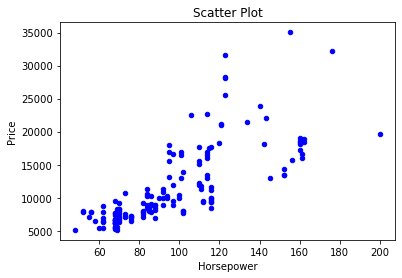

In [7]:
auto.plot(kind='scatter',x='horsepower',y='price',color='Blue')
plt.title('Scatter Plot')
plt.ylabel('Price')
plt.xlabel('Horsepower')
plt.show()

## Regression Line

In [14]:
def calculate_slope_intercept(x_values, y_values):
    """
    Calculate the slope and intercept of a regression line.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the slope and y-intercept of the line.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [15]:
def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(xs, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

## Plotting Regression Line

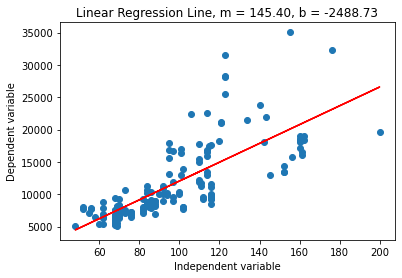

In [16]:
xs = auto.horsepower

ys = auto.price

show_least_squares_line('Linear Regression Line', 'Dependent variable', 
                        'Independent variable', xs, ys)

## Co-efficient of Determination


In [17]:
def calculate_ss(x_values, y_values):
    """
    Calculate the residual and total sums of squares.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the residual and total sums of squares.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    ss_residual = sum_yy - b*sum_y - m*sum_xy
    ss_total    = sum_yy - (sum_y*sum_y)/n
    
    return ss_residual, ss_total

In [18]:
def calculate_r2(ss_residual, ss_total):
    """
    Calculate the coefficient of determination.
    @param ss_residual the residual sum of squares.
    @param ss_total the total sum of squares.
    @return the coefficient of determination.
    """
    cofd = 1 - ss_residual/ss_total
    return cofd

#### Priting SS_Residual, SS_Total & Coefficient of determination

In [19]:
ss_residual, ss_total = calculate_ss(xs, ys)

print(f'ss_residual = {ss_residual:8.5f}')
print(f'ss_total    = {ss_total:8.5f}')

ss_residual = 2306831362.19541
ss_total    = 5458772565.37107


#### Coefficient of determination (r^2)

In [20]:
r2 = calculate_r2(ss_residual, ss_total)

print(f'coefficient of determination = {r2:.3f}')

coefficient of determination = 0.577


## Coefficient of Corelation

In [21]:
def calculate_r(x_values, y_values):
    """
    Calculate the correlation coefficient.
    @param x_values the x values.
    @param y_values the y values.
    @return the correlation coefficient.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = math.sqrt(sum_xx - (sum_x*sum_x)/n)*math.sqrt(sum_yy - (sum_y*sum_y)/n)
    
    r = numerator/denominator
    return r

#### Corelation Coefficient

In [22]:
r = calculate_r(xs, ys)

print(f'r = {r:.3f}')

r = 0.760


# Analysis